In [ ]:
#This notebook is to explore and understand performance of difference CNN architecture variants by tuning Hyperparameters

In [ ]:
'''
#This is the order of evaluation

1.Custom CNN variant - Completed
2.LeNet - Completed
3.AlexNet - Yet to do
4.VGG16 - Yet to do
5.Resnet - yet to do

'''

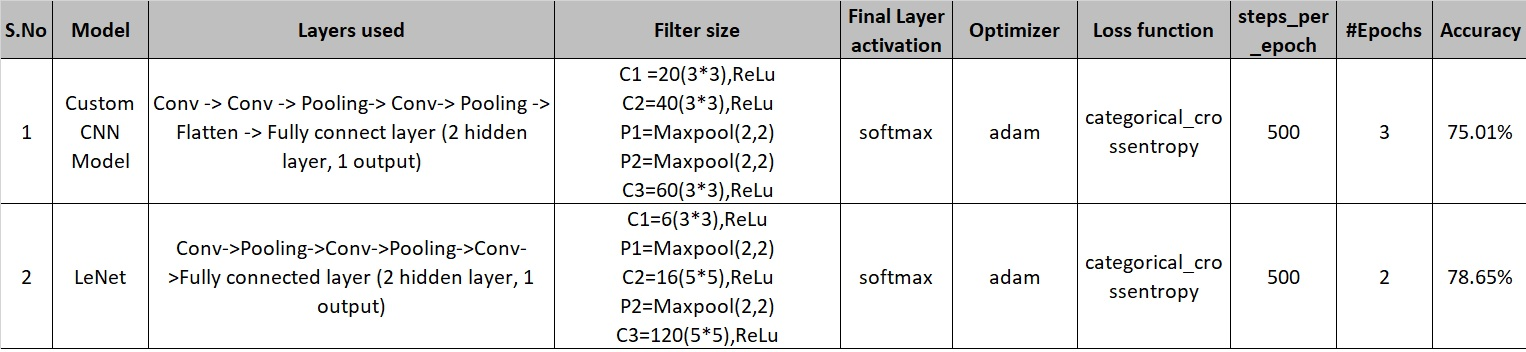

In [80]:
from IPython.display import Image 
Image("C:\\Users\\venkatar\\Desktop\\Srikanth\\DL\\Model comparison.jpg")

# Use case - Classifying different Natural locations using Image Classification


In [ ]:
'''
Data set - This Data contains around 25k images under 6 categories.
{'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 }

'''

# Model1 - Custom CNN variant

In [13]:
'''
#Let us start with Custom CNN Variant
Conv -> conv -> Pooling-> conv-> Pooling -> Flatten -> fully connected layer ->Fully connect layer

Accuracy achieved is 81.03%

'''

'\n#Let us start with Custom CNN Variant\nConv -> conv ->Pooling->conv->Pooling ->Flatten -> fully connected layer\n\n#Table to be shown\n\n'

In [14]:
#Importing libraries
import keras
from keras.layers import Conv2D, MaxPooling2D,Dense,Flatten
from keras.models import Sequential

In [ ]:
#data preprocessing

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:\\Users\\venkatar\\Desktop\\Srikanth\\DL\\Imageclassification\\Data\\train',
                                                  target_size = (224,224),batch_size = 32)
                                                 

test_set = test_datagen.flow_from_directory('C:\\Users\\venkatar\\Desktop\\Srikanth\\DL\\Imageclassification\\Data\\test',
                                            target_size = (224,224),batch_size = 32)

In [67]:
classifier = Sequential()

#Two Convolution layers
classifier.add(Conv2D(20,(3,3),padding='valid',input_shape = (224, 224, 3), activation = 'relu'))
classifier.add(Conv2D(40,(3,3),padding='valid',activation = 'relu'))


#Pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Single convolution layer
classifier.add(Conv2D(60,(3,3),padding='valid',activation = 'relu'))

#Single Pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Flatten layer
classifier.add(Flatten())

#Fully connected layer
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 6,activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


classifier.fit_generator(training_set,steps_per_epoch=500,epochs =2,validation_data = test_set,validation_steps = 2000)

#Saving model to local disk for future training
classifier.save("CustomCNNmodel.h5")
print("saved model to disk")

Epoch 1/2
500/500 [==============================] - 2646s 5s/step - loss: 0.9609 - acc: 0.6337 - val_loss: 0.8131 - val_acc: 0.7046
Epoch 2/2
500/500 [==============================] - 2776s 6s/step - loss: 0.6851 - acc: 0.7501 - val_loss: 0.6145 - val_acc: 0.7805
saved model to disk


In [69]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 222, 222, 20)      560       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 220, 220, 40)      7240      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 110, 110, 40)      0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 108, 108, 60)      21660     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 54, 54, 60)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 174960)            0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               22395008  
__________

In [72]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("C:\\Users\\venkatar\\Desktop\\Srikanth\\DL\\Imageclassification\\Data\\seg_pred\\169.jpg", target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
result

array([[7.948357e-27, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 1.182182e-38]], dtype=float32)

In [73]:
if result[0][0] == 1:
    prediction = 'Building'
    print(prediction)
if result[0][1] == 1:
    prediction = 'Forest'
    print(prediction)
if result[0][2] == 1:
    prediction = 'Glacier'
    print(prediction)
if result[0][3] == 1:
    prediction = 'Mountain'
    print(prediction)
if result[0][4] == 1:
    prediction = 'Sea'
    print(prediction)
if result[0][5] == 1:
    prediction = 'Street'
    print(prediction)

Glacier


# Model2 - LeNet

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,pooling,Flatten,Dense

In [29]:
lenetmodel=Sequential()

In [30]:
lenetmodel.add(Conv2D(6,(3,3),padding='valid',input_shape = (224, 224, 3), activation = 'relu'))
lenetmodel.add(MaxPooling2D(pool_size=(2, 2)))
lenetmodel.add(Conv2D(16,kernel_size=(5,5),activation='relu'))
lenetmodel.add(MaxPooling2D(pool_size=(2, 2)))
lenetmodel.add(Conv2D(120,kernel_size=(5,5),activation='relu'))
lenetmodel.add(Flatten())
lenetmodel.add(Dense(120, activation='relu'))
lenetmodel.add(Dense(84, activation='relu'))
lenetmodel.add(Dense(6, activation='softmax'))
lenetmodel.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


lenetmodel.fit_generator(training_set,steps_per_epoch=500,epochs =2,validation_data = test_set,validation_steps = 2000)

Epoch 1/2
500/500 [==============================] - 1151s 2s/step - loss: 0.9279 - acc: 0.6431 - val_loss: 0.6981 - val_acc: 0.7482
Epoch 2/2
500/500 [==============================] - 1277s 3s/step - loss: 0.6745 - acc: 0.7490 - val_loss: 0.5812 - val_acc: 0.7865


In [34]:
#Saving model to local disk for future training
lenetmodel.save("lenetcustomodel.h5")

In [33]:
lenetmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 222, 222, 6)       168       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 111, 111, 6)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 107, 107, 16)      2416      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 53, 53, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 49, 49, 120)       48120     
_________________________________________________________________
flatten_10 (Flatten)         (None, 288120)            0         
_________________________________________________________________
dense_21 (Dense)             (None, 120)               34574520  
__________

In [70]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("C:\\Users\\venkatar\\Desktop\\Srikanth\\DL\\Imageclassification\\Data\\seg_pred\\169.jpg", target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = lenetmodel.predict(test_image)
result

array([[0., 0., 1., 0., 0., 0.]], dtype=float32)

In [71]:
if result[0][0] == 1:
    prediction = 'Building'
    print(prediction)
if result[0][1] == 1:
    prediction = 'Forest'
    print(prediction)
if result[0][2] == 1:
    prediction = 'Glacier'
    print(prediction)
if result[0][3] == 1:
    prediction = 'Mountain'
    print(prediction)
if result[0][4] == 1:
    prediction = 'Sea'
    print(prediction)
if result[0][5] == 1:
    prediction = 'Street'
    print(prediction)

Glacier


# Model3 - Alexnet

# Model4 - VGG16

# Model3 - Resnet